In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [3]:
#importa datos del aranet4
aranet = pd.read_csv("../../data/Aztec Eagle Turbo_2021-06-28T12_08_22.csv",index_col=0,parse_dates=True,
                    names=["aranet","To","HR","P"],skiprows=1)
aranet

,aranet,To,HR,P
2021-06-25 00:05:22,903,26.4,63,872
2021-06-25 00:06:22,908,26.4,63,872
2021-06-25 00:07:22,905,26.4,63,872
2021-06-25 00:08:22,933,26.4,62,872
2021-06-25 00:09:22,916,26.4,63,872
...,...,...,...,...
2021-06-28 12:03:22,467,25.7,68,879
2021-06-28 12:04:22,476,25.6,67,879
2021-06-28 12:05:22,476,25.6,67,879
2021-06-28 12:06:22,469,25.6,68,879


In [15]:
#importa datos del fluke
fluke = pd.read_csv("../../data/fluke_25062021_28062021.csv",encoding="iso-8859-1",
                   skiprows=13,usecols=[7,11],
                   names=["fluke","tiempo"],)
fluke.tiempo = pd.to_datetime(fluke.tiempo,format="%d/%m/%Y %H:%M")
fluke.set_index("tiempo",inplace=True)
fluke.fluke = fluke.fluke.str.replace(" ppm","")
fluke.fluke = fluke.fluke.astype("float64")
fluke = fluke[~fluke.index.duplicated()]
fluke.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4153 entries, 2021-06-25 15:04:00 to 2021-06-28 12:16:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fluke   4153 non-null   float64
dtypes: float64(1)
memory usage: 64.9 KB


In [17]:
referencia = pd.concat([aranet.aranet,fluke.fluke],axis=1)
referencia

,aranet,fluke
2021-06-25 00:05:22,903.0,NaN
2021-06-25 00:06:22,908.0,NaN
2021-06-25 00:07:22,905.0,NaN
2021-06-25 00:08:22,933.0,NaN
2021-06-25 00:09:22,916.0,NaN
...,...,...
2021-06-28 12:12:00,NaN,479.0
2021-06-28 12:13:00,NaN,478.0
2021-06-28 12:14:00,NaN,468.0
2021-06-28 12:15:00,NaN,473.0


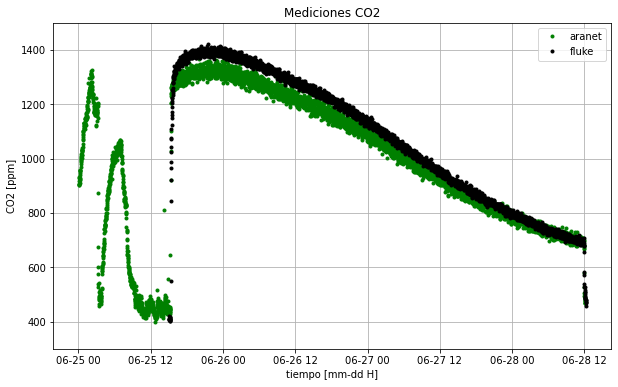

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

fecha1 = parse("2021-06-25") 
fecha2 = fecha1 + pd.Timedelta("3D")

# ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,1500)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")

ax.plot(referencia.aranet,"g.",label="aranet")
ax.plot(referencia.fluke, "k.",label="fluke")


ax.legend()
ax.grid()

In [ ]:
referencia.to_csv("../data/referencia2.csv")